# Multiple Linear Regression

Machine Learning Week 1 Task 1 - Azmi Taqiuddin Syah - 1103213078

## Importing the libraries

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Importing the dataset

In [231]:
df = pd.read_csv("Dataset\\50_Startups.csv")
df[:5]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [232]:
data = pd.get_dummies(df, columns=['State'], drop_first=True)

In [233]:
X = data.drop('Profit', axis=1)
y = data['Profit']

## Splitting the dataset into the Training set and Test set

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training the Multiple Linear Regression model on the Training set

In [235]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [236]:
y_pred = model.predict(X_test)

In [237]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [238]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 82010363.04430111
R-squared: 0.8987266414328636
Koefisien: [ 8.05630064e-01 -6.87878823e-02  2.98554429e-02  9.38793006e+02
  6.98775997e+00]
Intercept: 54028.03959364583


In [239]:
def plot_regression(x, y, y_pred, x_label, title):
    plt.figure(figsize=(7, 5))
    sns.regplot(x=x, y=y, marker='o', label='Yang Sebenarnya', color='blue')
    sns.scatterplot(x=x, y=y_pred, label='Prediksi', color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

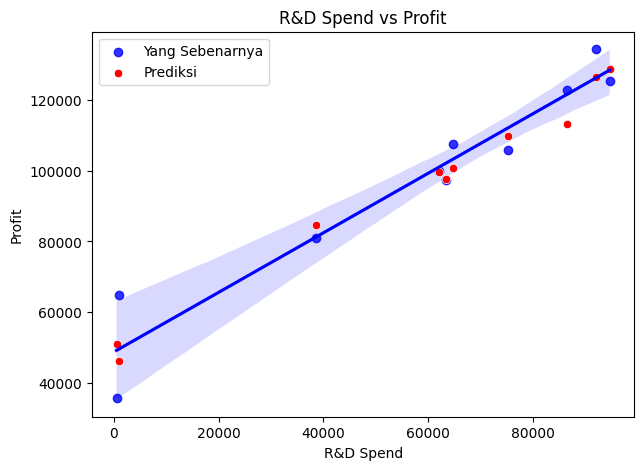

In [240]:
plot_regression(X_test['R&D Spend'], y_test, y_pred, 'R&D Spend', 'R&D Spend vs Profit')

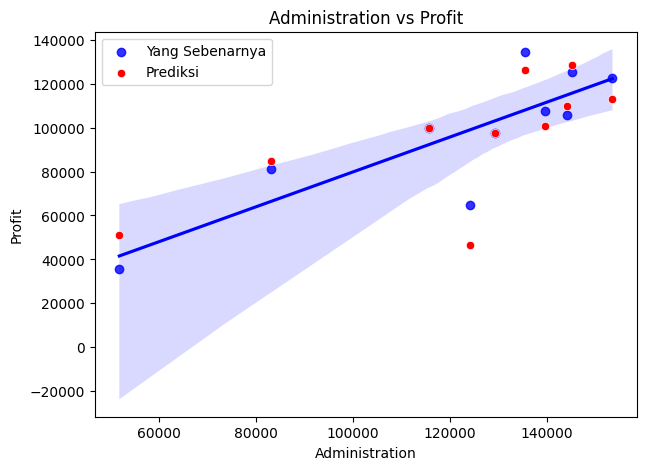

In [241]:
plot_regression(X_test['Administration'], y_test, y_pred, 'Administration', 'Administration vs Profit')

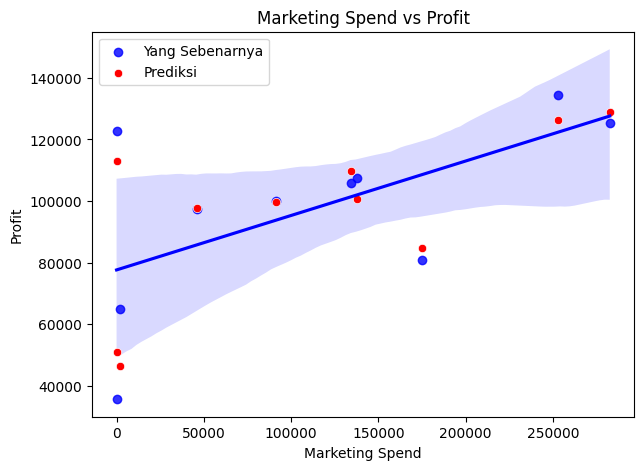

In [242]:
plot_regression(X_test['Marketing Spend'], y_test, y_pred, 'Marketing Spend', 'Marketing Spend vs Profit')